In [34]:
# import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [35]:
# read data
csvPath = 'BTCUSD_M15.csv'
df = pd.read_csv(csvPath)
df.head()

,Time,Open,High,Low,Close,Volume,size
0,2017-05-22 23:00:00,2104.6,2134.0,2101.3,2131.2,19,32.7
1,2017-05-22 23:15:00,2131.2,2153.2,2123.7,2132.9,17,29.5
2,2017-05-22 23:30:00,2132.8,2136.4,2116.8,2135.1,22,19.6
3,2017-05-22 23:45:00,2142.4,2154.2,2112.8,2142.1,24,41.4
4,2017-05-23 00:00:00,2142.4,2169.6,2117.5,2162.3,16,52.1


In [36]:
# Preprossing data

# convert to number
df = df.astype({'Open': int, 'High': int, 'Low': int, 'Close': int, 'Volume': int})

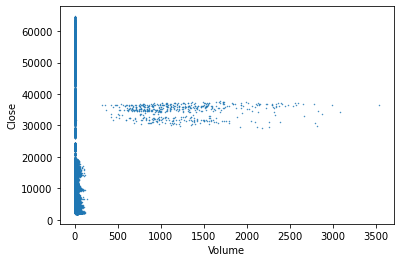

In [37]:
# plot data
volume = np.asanyarray(df[['Volume']])
close = np.asanyarray(df[['Close']])

plt.scatter(volume, close, s=0.2)
plt.xlabel('Volume')
plt.ylabel('Close')
plt.show()

In [38]:
# Simple Linear regression
dfTrain = df.sample(frac=0.8, random_state=4)
dfTest = df.drop(dfTrain.index)

volumeTrain = np.asanyarray(dfTrain[['Volume']])
closeTrain = np.asanyarray(dfTrain[['Close']])
volumeTest = np.asanyarray(dfTest[['Volume']])
closeTest = np.asanyarray(dfTest[['Close']])

reg = LinearRegression()
reg.fit(volumeTrain, closeTrain)
closePredict = reg.predict(volumeTest)

percent = r2_score(closeTest, closePredict)
print("Predict: {}%".format(percent))

Predict: 0.006360059802023699%


In [39]:
## add size of candle
# df['size'] = df['High'] - df['Low']
# df['size'] = df['size'].apply(pd.to_numeric, errors='coerce')

## save changes
#df.to_csv(csvPath)
#df.head()

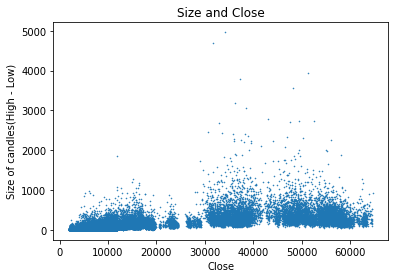

Predict: 0.4848979441508322%


In [40]:
# plot with size
x = np.asanyarray(df[['Close']])
y = np.asanyarray(df[['size']])
plt.title('Size and Close')
plt.scatter(x, y, s=0.3)
plt.xlabel('Close')
plt.ylabel('Size of candles(High - Low)')
plt.show()

# predict with size of candles
sizeTrain = np.asanyarray(dfTrain[['size']])
sizeTest = np.asanyarray(dfTest[['size']])

reg.fit(sizeTrain, closeTrain)
closePredict = reg.predict(sizeTest)
percent = r2_score(closeTest, closePredict)
print('Predict: {}%'.format(percent))

In [49]:
# shift Close to up
# df['close_real'] = df['Close']
# df['Close'] = df['Close'].shift(-1)
df.tail()
print('Shifted')


# delete last and first row
# df = df[1:-1]
df.head()
df.to_csv(csvPath)

Shifted


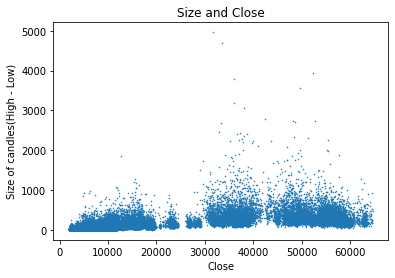

Predict: 0.4848979441508322%


In [50]:
# predict after shift close
# plot with size
x = np.asanyarray(df[['Close']])
y = np.asanyarray(df[['size']])
plt.title('Size and Close')
plt.scatter(x, y, s=0.3)
plt.xlabel('Close')
plt.ylabel('Size of candles(High - Low)')
plt.show()

# predict with size of candles
sizeTrain = np.asanyarray(dfTrain[['size']])
sizeTest = np.asanyarray(dfTest[['size']])

reg.fit(sizeTrain, closeTrain)
closePredict = reg.predict(sizeTest)
percent = r2_score(closeTest, closePredict)
print('Predict: {}%'.format(percent))

In [51]:
df

,Time,Open,High,Low,Close,Volume,size,close_real
1,2017-05-22 23:15:00,2131,2153,2123,2135.0,17,29.5,2135.0
2,2017-05-22 23:30:00,2132,2136,2116,2142.0,22,19.6,2142.0
3,2017-05-22 23:45:00,2142,2154,2112,2162.0,24,41.4,2162.0
4,2017-05-23 00:00:00,2142,2169,2117,2175.0,16,52.1,2175.0
5,2017-05-23 00:15:00,2162,2181,2146,2153.0,16,34.4,2153.0
...,...,...,...,...,...,...,...,...
99989,2021-06-09 19:15:00,36228,36282,36109,36419.0,1,173.3,36419.0
99990,2021-06-09 19:30:00,36218,36469,36202,36362.0,1,266.8,36362.0
99991,2021-06-09 19:45:00,36419,36424,36336,36521.0,1,87.4,36521.0
99992,2021-06-09 20:00:00,36362,36540,36349,36222.0,1,191.4,36222.0
